In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from sklearn.model_selection import KFold
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, Lasso,Ridge

In [2]:
train_x = pd.read_csv('C:\\Users\\odoru\\SIGNATE_time_deposit_account\\dataset\\train_x_xgboost.csv')
train_y = pd.read_csv('C:\\Users\\odoru\\SIGNATE_time_deposit_account\\dataset\\train_y_xgboost.csv')
test_x = pd.read_csv('C:\\Users\\odoru\\SIGNATE_time_deposit_account\\dataset\\test_x_xgboost.csv')

In [3]:
#hold out 法
kf = KFold(n_splits=4, shuffle=True, random_state=71)
tr_idx, va_idx = list(kf.split(train_x))[0]
tr_x,va_x = train_x.iloc[tr_idx], train_x.iloc[va_idx]
tr_y,va_y = train_y.iloc[tr_idx], train_y.iloc[va_idx] 


clf = Ridge()
clf.fit(tr_x, tr_y)
va_pred = clf.predict(va_x)
score = log_loss(va_y,va_pred)
print(score)

0.28145255623497306


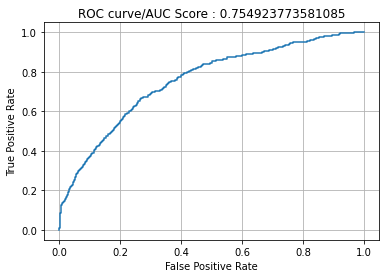

In [4]:
fig = plt.figure()

fpr,tpr,thresholds = roc_curve(va_y,va_pred)
auc_score = roc_auc_score(va_y,va_pred)

plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC curve/AUC Score : {auc_score}')

plt.grid(True)